In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import warnings
from sklearn import linear_model

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

weather_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

engine.dispose()

#drop invalid column 'loudcover'
weather_df = weather_df.drop(['loudcover'], axis=1)

#drop column 'apparenttemperature' (redundant with temperature)
weather_df = weather_df.drop(['apparenttemperature'], axis=1)


In [33]:
weather_df[['temperature', 'humidity', 'windspeed', 
            'windbearing', 'visibility', 'pressure']].corr()

,temperature,humidity,windspeed,windbearing,visibility,pressure
temperature,1.000000,-0.632255,0.008957,0.029988,0.392847,-0.005447
humidity,-0.632255,1.000000,-0.224951,0.000735,-0.369173,0.005454
windspeed,0.008957,-0.224951,1.000000,0.103822,0.100749,-0.049263
windbearing,0.029988,0.000735,0.103822,1.000000,0.047594,-0.011651
visibility,0.392847,-0.369173,0.100749,0.047594,1.000000,0.059818
pressure,-0.005447,0.005454,-0.049263,-0.011651,0.059818,1.000000


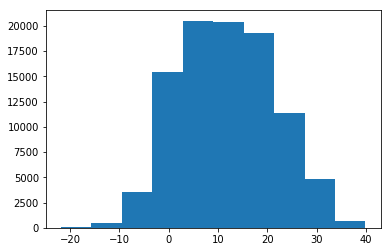


Coefficients: 
 [-2.91526993e+01 -2.05732449e-01  3.26860785e-03  4.26211115e-01
 -1.65688320e-03]

Intercept: 
 32.22027226986848


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                 1.582e+04
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        09:24:39   Log-Likelihood:            -3.2564e+05
No. Observations:               96453   AIC:                         6.513e+05
Df Residuals:                   96447   BIC:                         6.514e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          32.2203      0.240    134.131      0.000      31.749      32.691
humidity      -29.1527      0.128   -227.236      0.000     -29.404     -28.901
windspeed      -0.2057      0.003    -60.365      0.000      -0.212      -0.199
windbearing     0.0033      0.000     15.289      0.000       0.003       0.004
visibility      0.4262      0.006     72.566      0.000       0.415       0.438
pressure       -0.0017      0.000     -8.471      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     3452.090   Durbin-Watson:                   0.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3877.739
Skew:                          -0.463   Prob(JB):                         0.00
Kurtosis:                       3.326   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
#see if temperature data is roughly normally distributed
plt.hist(weather_df['temperature'])
plt.show()

#linear regression model
y = weather_df['temperature']
X = weather_df[['humidity', 'windspeed', 'windbearing', 'visibility', 'pressure']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)

import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(y, X).fit()

results.summary()


Coefficients: 
 [-2.915e+00 -2.057e-01  3.260e-03  4.260e-01 -1.660e-03]

Intercept: 
 32.22000000000007


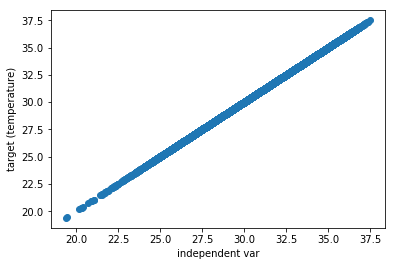

In [60]:
#Assumption one: linearity of the model in its coefficients

#equation: intercept + b1x1 + b2x2 + .... + b5x5 
df['y'] = 32.22 - 2.915*weather_df['humidity'] - 0.2057*weather_df['windspeed'] + .00326*weather_df['windbearing'] + 0.426*weather_df['visibility'] - 0.00166*weather_df['pressure']

# fit a linear regression where target is y and features are the independent variables
lrm_example = linear_model.LinearRegression()
lrm_example.fit(weather_df[['humidity', 'windspeed', 'windbearing', 'visibility', 'pressure']],df['y'])

# predictions of the linear regression
predictions = lrm_example.predict(df[['humidity', 'windspeed', 'windbearing', 'visibility', 'pressure']])

# we print the estimated coefficients
print('\nCoefficients: \n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)

# we plot the estimated Y and X
plt.scatter(df['y'], predictions)
plt.xlabel('independent var')
plt.ylabel("target (temperature)")
plt.show()


In [45]:
#Assumption two: the error term should be zero on average

X = weather_df[['humidity', 'windspeed', 'windbearing', 'visibility', 'pressure']]
predictions = lrm.predict(X)

errors = Y - predictions

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))


Mean of the errors in the medical costs model is: 1.5017069109794036e-16


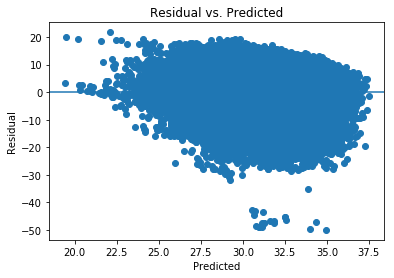

In [53]:
#Assumption three: homoscedasticity

#visualize distribution of errors
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [54]:
#Bartlett and Levene tests for homoscedasticity
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 100053 and p value is 0
Levene test statistic value is 69129.9 and p value is 0


In [55]:
#Assumption four: multicolinearilty
#In the initial data review, I dropped the column 'apparenttemperature' because it 
#was co-linear with temperature. The other variables are not

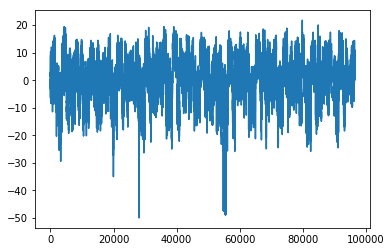

In [56]:
#Assumption five: error terms should be uncorrelated with one another
plt.plot(errors)
plt.show()

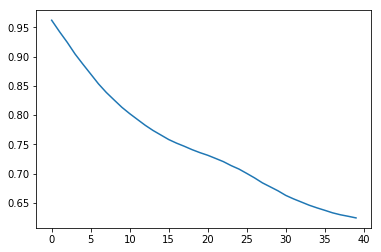

In [57]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

In [58]:
#this last plot shows that the autocorrelation between the errors of our weather variables is too high (0.65 - 0.95)